# Medical Imaging
## 2020-2021

### Lab 2

### Group 13:
- Alexandra Gonçalves | nº89785
- Catarina Carvalho   | nº89791
- Diogo Vieira        | nº89794
- Mariana Mourão      | nº98473

### Importing relevant libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon
from skimage.util import random_noise
from skimage.transform.radon_transform import _get_fourier_filter

### 1. Generating the Modified Shepp-Logan Phantom

Old phantom size: (400, 400)
New phantom size: (256, 256)


Text(0.5, 1.0, 'Shepp-Logan phantom')

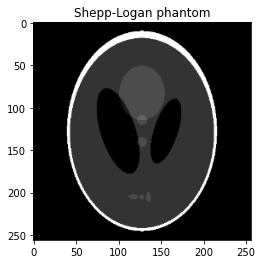

In [23]:
image = shepp_logan_phantom()
print('Old phantom size: '+str(image.shape))
#when resizing, we choose the percentage in which we want to increase/decrease the image.
#it was originally 400x400, so to make it 256x256, we must make it 64% of it's original size
image = rescale(image, scale=0.64, mode='reflect', multichannel=False)
print('New phantom size: '+str(image.shape)) #checking the image in the correct dimensions
plt.imshow(image,  cmap='gray')
plt.title('Shepp-Logan phantom')

### 2. Simulating the Sinogram

C:\Users\Catarina\Anaconda3\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


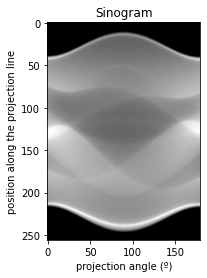

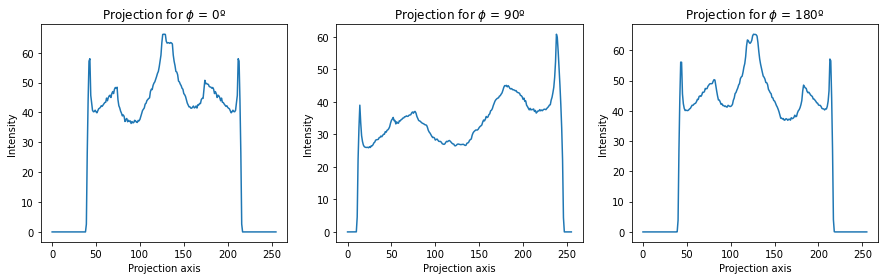

In [24]:
#we use a linspace function to generate evenly spaced numbers in the interval [0,180].
#we tell the function to generate 181 samples to get numbers from 0 to 180 in steps of 1.
theta = np.linspace(0., 179., 180)
#print(theta)
sinogram = radon(image, theta=theta, circle=True)
plt.imshow(sinogram,  cmap='gray')
plt.title('Sinogram')
plt.xlabel('projection angle (º)')
plt.ylabel('position along the projection line')

# Isolate representative projections...
proj_0 = sinogram[:,0]
proj_90 = sinogram[:,89]
proj_180 = sinogram[:,179]
projs = ["proj_0","proj_90","proj_180"]
phis  = [0,90,180]

# ... and plot them
plt.figure(figsize=(15,4))
for i in range(0,3):
    plt.subplot(1,3,i+1)
    plt.plot(eval(projs[i]))
    plt.title('Projection for $\phi$ = '+ str(phis[i]) + 'º')
    plt.ylabel('Intensity')
    plt.xlabel('Projection axis')

- The projection for $\phi$ = 0º is a mirror of the one obtained for $\phi$ = 180º. This is an expected result because it goes along with the symmetry at $\pi$ which is a property of the Radon transform.
- The projection for $\phi$ = 90º is wider than the rest (goes from near 0 to near 250), because of the oval shape of the phantom - its height is bigger than its width.

### 3. Image Reconstruction Using the Inverse Radon Transform

The sinogram lies in the projection space. We can go back to the object space and recover the original image by computing the inverse Radon transform. The function `iradon` applies the Fourier Slice Theorem to reconstruct an image by multiplying the frequency domain of the filter with the FFT of the projection data. This algorithm is called filtered back projection.

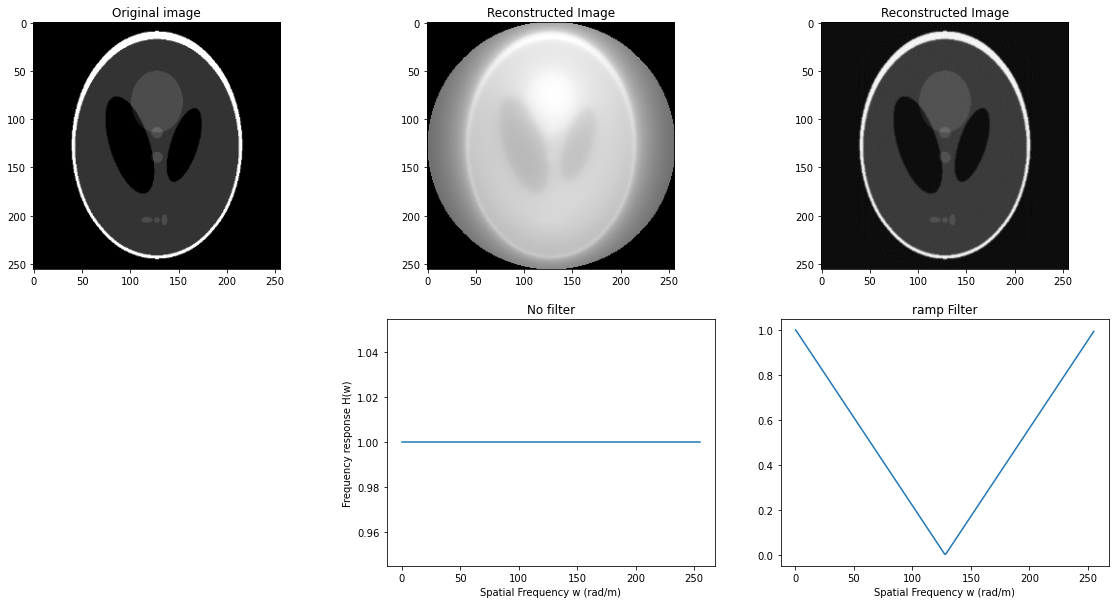

In [26]:
# Plot original image for comparison
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original image')

filters = [None, 'ramp']

for i in range(len(filters)):
    im_rec = iradon(sinogram, circle=True, filter_name=filters[i])
    response = _get_fourier_filter(np.size(im_rec,0),filters[i])
    
    plt.subplot(2,3,i+5)
    plt.plot(np.fft.fftshift(response))
    plt.xlabel('Spatial Frequency w (rad/m)')
    if i==0:
        plt.ylabel('Frequency response H(w)')
        plt.title('No filter') 
    else:
        plt.title(filters[i] + ' Filter')
    
    plt.subplot(2,3,i+2)
    plt.imshow(im_rec,  cmap='gray')
    plt.title('Reconstructed Image')

### 4. Image Reconstruction from the Sinograms Covering Different Angles

From the original image it is possible to obtain sinograms that cover only a certain range of angle of projections. In the code below we will assume angles of projection $\phi$ within the intervals [0,45]º, [0,90]º, [0,180]º and [0,360]º with unitary step. Finally, and as done previously, we can try to recover the original image by computing the inverse Radon transform using the sinograms obtained as input.

C:\Users\Catarina\Anaconda3\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


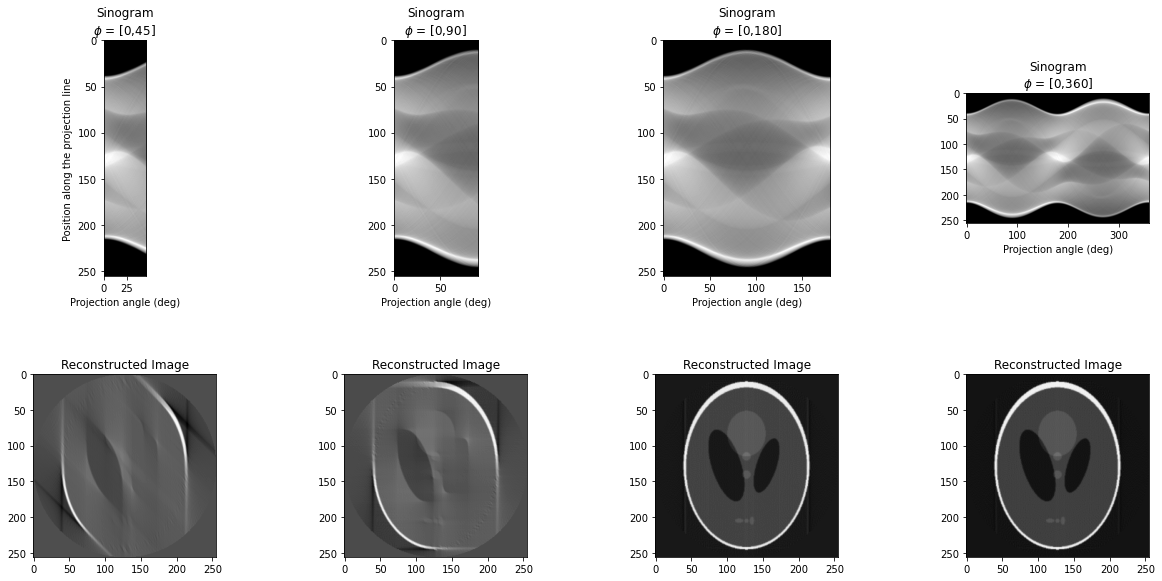

In [27]:
thetas = [45,90,180,360]

plt.figure(figsize=(20,10))
for i in range(len(thetas)):
    # Sinograms
    plt.subplot(2,len(thetas),i+1)
    theta = np.linspace(0., thetas[i], thetas[i]+1)
    sinogram = radon(image, theta=theta, circle=True)
    plt.imshow(sinogram,  cmap='gray')
    plt.title('Sinogram' + '\n' + '$\phi$ = [0,' + str(thetas[i]) + ']')
    plt.xlabel('Projection angle (deg)')
    if i==0:
        plt.ylabel('Position along the projection line')
    plt.subplots_adjust(wspace=0.7,hspace=0.3)
    
    # Reconstruction
    im_rec = iradon(sinogram, theta=theta , circle=True);
    plt.subplot(2,len(thetas),i+len(thetas)+1)
    plt.imshow(im_rec,  cmap='gray')
    plt.title('Reconstructed Image')
    plt.subplots_adjust(wspace=0.7) 

- For the ranges $\phi\in$ [0,45]º, [0,90]º we were unable to recover the original image from the resulting sinograms, because we need to cover at least 180º of projections;
- For the range $\phi\in$ [0,180]º the original image was recovered, as expected.
- Due to the properties of the Radon transform (symmetry at $\pi$ and periodicity at $2\pi$), for the range $\phi\in$ [0,360]º we obtained the original image, just like we did with $\phi\in$ [0,180]º. Also, after 180º, the sinogram starts to repeat itself, adding no useful information.

To assess interatively the effect of considering different angle coverages, the following widget was developed.

In [28]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(phi_max):
    plt.figure(figsize=(16,5))
    theta = np.linspace(0., phi_max-1, phi_max)
    
    plt.subplot(1,3,1)
    sinogram = radon(image, theta=theta, circle=True)
    plt.title('Sinogram' + '\n' + '$\phi$ = [0,' + str(phi_max) + '[º')
    plt.xlabel('Projection angle (º)')
    plt.ylabel('Position along the projection line')
    plt.imshow(sinogram,  cmap='gray')
    
    plt.subplot(1,3,2)
    im_rec = iradon(sinogram, theta=theta , circle=True)
    plt.title('Reconstructed Image')
    plt.imshow(im_rec,  cmap='gray')
    
    plt.subplot(1,3,3)
    proj = sinogram[:,phi_max-1]
    plt.plot(proj)
    plt.title('Projection for $\phi$ = '+ str(phi_max) + 'º')
    plt.ylabel('Intensity')
    plt.xlabel('Projection axis')    
    return 
    
interact(f, phi_max=(0,360,20));

interactive(children=(IntSlider(value=180, description='phi_max', max=360, step=20), Output()), _dom_classes=(…

### 5. Sinogram and Image Reconstruction in steps with different sizes

C:\Users\Catarina\Anaconda3\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


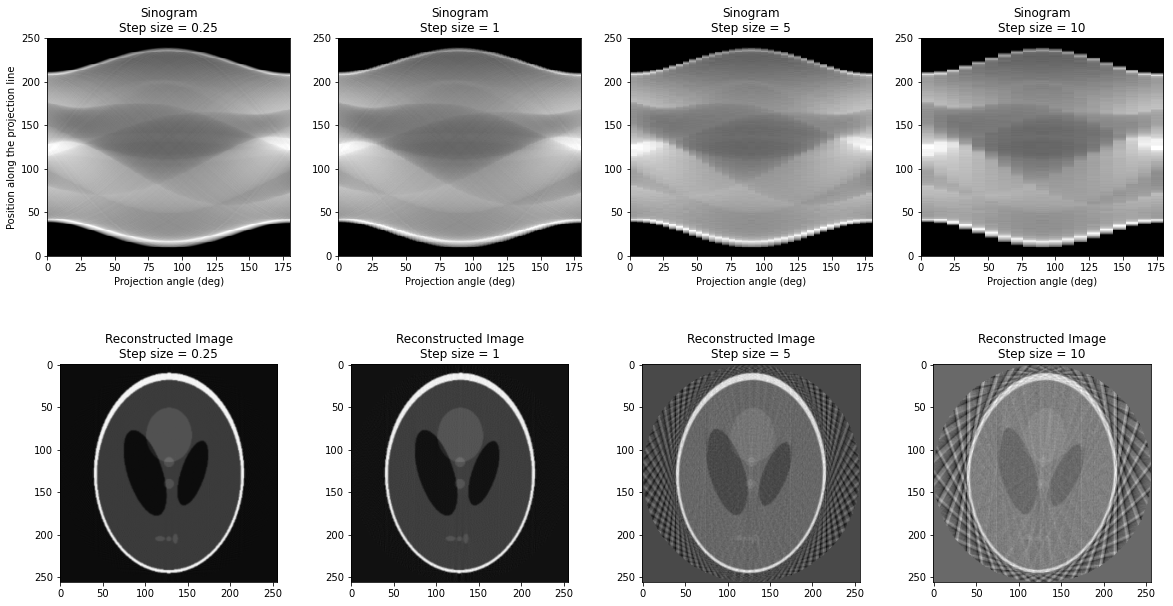

In [29]:
step_sizes = [0.25, 1, 5, 10]
plt.figure(figsize=(20,10))

# Simulate the sinogram and the reconstructed image for each step size
for i in range(len(step_sizes)):
    
    step = step_sizes[i]    # size of the step
    n_samples = int(180/step + 1)     # Number of angle samples
    theta = np.linspace(0., 180., n_samples)     # Angle samples
    sinogram = radon(image, theta=theta, circle=True)     # Generate the sinogram
    
    
    # Plot the sinograms
    plt.subplot(2,len(step_sizes),i+1)
    plt.imshow(sinogram,  cmap='gray', extent=[0,180,0,250], interpolation='nearest', aspect='auto')
    plt.title('Sinogram' + '\n' + 'Step size = ' + str(step))
    plt.xlabel('Projection angle (deg)')
    if i==0:
        plt.ylabel('Position along the projection line')     
    
    im_rec = iradon(sinogram,circle=True)     # Reconstruct the images
    plt.subplot(2,len(step_sizes),i+1+len(step_sizes))
    plt.imshow(im_rec,  cmap='gray')
    plt.title('Reconstructed Image' + '\n' + 'Step size = ' + str(step))

    plt.subplots_adjust(hspace=0.5)

The larger the step size, the less resolution we have in the sinogram and the more the reconstructed image differs from the original one. Having a shorter step size for a fixed angle range increases the quality of the reconstruction, because we can combine more projections to make the final image.

### 6) Simulate the sinogram and add noise

The photon count in an X-ray image has a statistical variability that follows a Poisson distribution. In these images, slight errors in the photon count translate into Poisson noise. The variance of Poisson distributions increases with the square root of their mean; so we have more Poisson noise in pixels where the photon count is larger. In short, Poisson noise heavily depends on the base values of the original image.

This Poisson approximation is valid for large photon counts.

#### Details about the function that generates Poisson Noise

According to the documentation of the function `random_noise`:

> "Because of the prevalence of exclusively positive floating-point images in intermediate calculations, it is not possible to intuit if an input is signed based on dtype alone. Instead, negative values are explicity searched for. Only if found does this function assume signed input. Unexpected results only occur in rare, poorly exposes cases (e.g. if all values are above 50 percent gray in a signed image). In this event, manually scaling the input to the positive domain will solve the problem.

> The Poisson distribution is only defined for positive integers. To apply this noise type, the number of unique values in the image is found and the next round power of two is used to scale up the floating-point result, after which it is scaled back down to the floating-point image range.

> To generate Poisson noise against a signed image, the signed image is temporarily converted to an unsigned image in the floating point domain, Poisson noise is generated, then it is returned to the original range."
    
The code used by this function to generate Poisson noise is the following:

```python
# Determine unique values in image & calculate the next power of two
vals = len(np.unique(image))
vals = 2 ** np.ceil(np.log2(vals))

# Ensure image is exclusively positive
if low_clip == -1.:
    old_max = image.max()
    image = (image + 1.) / (old_max + 1.)

# Generating noise for each unique value in image.
out = np.random.poisson(image * vals) / float(vals)

# Return image to original range if input was signed
if low_clip == -1.:
    out = out * (old_max + 1.) - 1
    
```

Here is an example of how it finds the next power of two for a list of numbers:

```python
a = [4., 5., 6., 7., 8., 9.] 
b = np.log2(a)                 # returns: [2.,  2.32192809,  2.5849625,  2.80735492,  3. , 3.169925  ]
c = np.ceil(b)                 # returns: [2., 3., 3., 3., 3., 4.]
d = 2**c                       # returns: [ 4., 8., 8., 8., 8., 16.]
```
This method does not work well with our image, since it made of floats instead of integers, with a very large number of unique values. For this reason, we used only the function `np.random.poisson`, included in the above source code, to generate the image with noise.

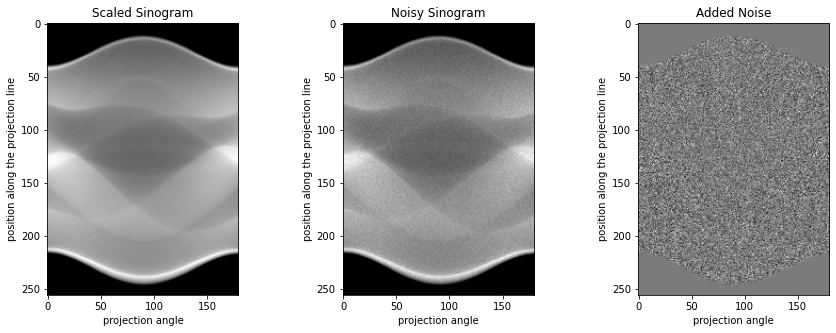

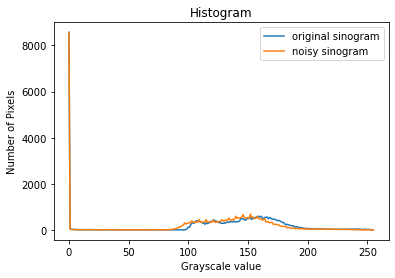

In [30]:
# Simulate the sinogram
theta = np.linspace(0., 179., 180)
sinogram = radon(image, theta=theta, circle=True)
max_value=np.max(sinogram)
min_value=np.min(sinogram)

# Use '1' for random_noise or '2' for random.noise
USING_FUNCTION = 2

# Scale the sinogram using maximum number of counts per pixel of 10^3 photons [maximum intensity = 10^3 photons]
scaled_sinogram = np.empty(sinogram.shape)
scaled_sinogram[:] = sinogram[:]*(1000.0/max_value)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(scaled_sinogram,  cmap='gray')
plt.title('Scaled Sinogram')
plt.xlabel('projection angle')
plt.ylabel('position along the projection line')

# Add Poisson Noise to the Scaled Sinogram
plt.subplot(132)

if USING_FUNCTION == 1:
    noisy_sinogram = random_noise(scaled_sinogram, mode='poisson', clip = False) #This method does not work well!
    
else:
    noisy_sinogram = np.random.poisson(scaled_sinogram)
    
plt.imshow(noisy_sinogram,  cmap='gray')
plt.title('Noisy Sinogram')
plt.xlabel('projection angle')
plt.ylabel('position along the projection line')

# Plot the image of the added noise
plt.subplot(133)
noise = noisy_sinogram - scaled_sinogram
plt.imshow(noise,  cmap='gray')
plt.title('Added Noise')
plt.xlabel('projection angle')
plt.ylabel('position along the projection line')

# Plot the histogram of the images
#np.mean(scaled_sinogram)
#scaled_sinogram
#max_value
plt.figure()
histogram, bin_edges = np.histogram(scaled_sinogram, bins=256) 
plt.title("Histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Number of Pixels")
plt.plot(histogram, label='original sinogram')

histogram, bin_edges = np.histogram(noisy_sinogram, bins=256) 
plt.title("Histogram")
plt.xlabel("Grayscale value")
plt.ylabel("Number of Pixels")
plt.plot(histogram, label = 'noisy sinogram')

plt.legend()

### 7. Reconstruction of Noisy Sinogram with the Original Filter 

Text(0.5, 1.0, 'Reconstructed image from noisy sinogram')

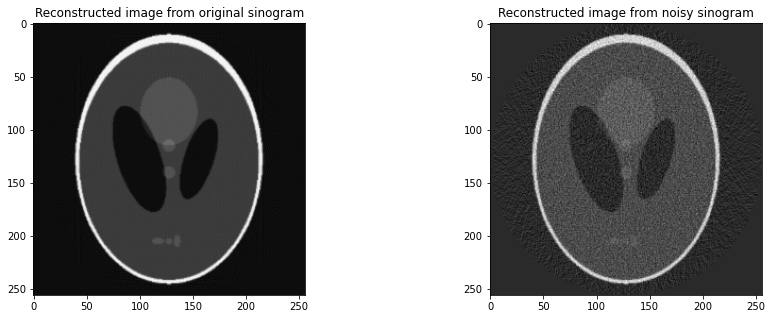

In [31]:
plt.figure(figsize=(15,5))

# For comparison, plot the reconstruted image from the original sinogram
im_rec = iradon(sinogram,circle=True); # Reconstructed image
plt.subplot(1,2,1)
plt.imshow(im_rec,  cmap='gray')
plt.title('Reconstructed image from original sinogram')

# Reconstructed image from the noisy sinogram
im_rec_noisy = iradon(noisy_sinogram,circle=True);
plt.subplot(1,2,2)
plt.imshow(im_rec_noisy,  cmap='gray')
plt.title('Reconstructed image from noisy sinogram')

High spatial frequencies, in addition to being associated with sudden variations in intensity between different organs and tissues, also represent noise in the image (rapid spatial variations in intensity). 

This way, as the modules of k filter (ram-lak filter, intrinsically involved in the inverse random transform) amplifies the high frequencies, it gives suboptimal noise cancelation (amplifies noise). Besides this, due to its frequency response, this filter behaves badly during the discrete inverse Fourier transform (generates irregularities). Given this, in a real scenario the ram-lak filter is adapted (post-processing step) by multiplying with several window functions for filtering (attenuating) the high frequency components, modifying the frequency response depending on the trade-off SNR (improved by reducing noise) and effective spatial resolution (preserve the details/edges of the image).

### 8. Backprojection with Modified Ram-Lak Filters 

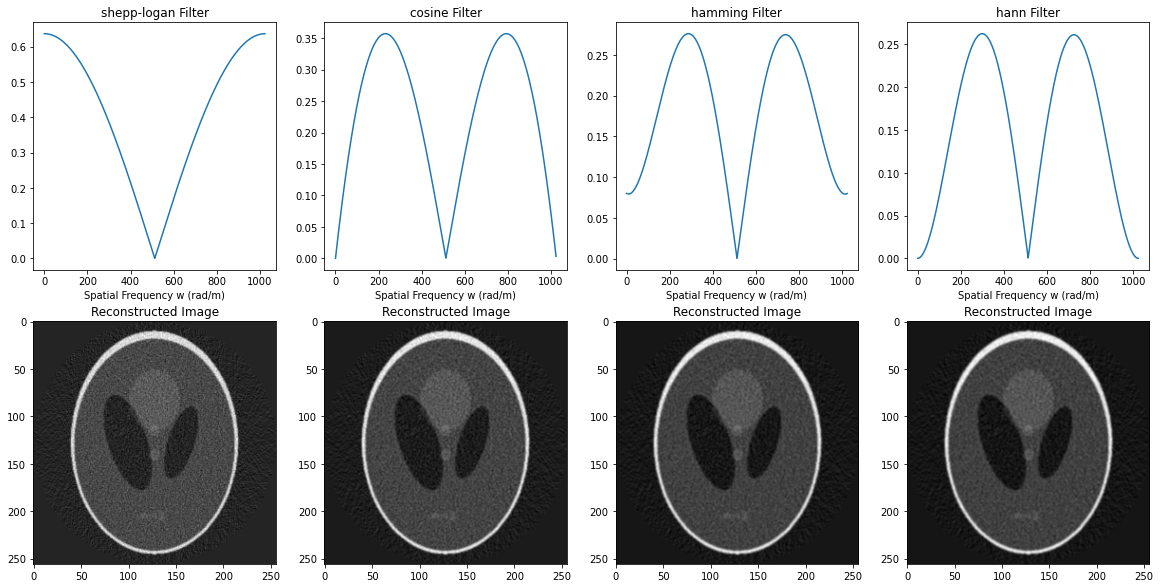

In [32]:
filters = ['shepp-logan', 'cosine', 'hamming', 'hann']

plt.figure(figsize=(20,10))

for i in range(len(filters)):
    im_rec_noisy = iradon(noisy_sinogram, circle=True, filter_name=filters[i])
    response = _get_fourier_filter(1024,filters[i])
    
    plt.subplot(2,len(filters),i+1)
    plt.plot(np.fft.fftshift(response))
    plt.xlabel('Spatial Frequency w (rad/m)')
    plt.title(filters[i] + ' Filter')
    
    plt.subplot(2,len(filters),len(filters)+i+1)
    plt.imshow(im_rec_noisy,  cmap='gray')
    plt.title('Reconstructed Image')

plt.show()   

Theorically, the noise reduction of these filters is better than that of the ram-lak filter; on the other hand, the resolution is also reduced.

Observing the reconstructed images, it can be concluded that the hann filter is the most effective in reducing image noise (improves the SNR and enhances the contrast), altough having the drawback of producing the poorest effective spatial resolution, with a noticeable blurring of the edges. This can be explained by steepest decay of its frequency response, namely for the higher frequencies (associated to noise and edges). 

Having the 2nd most effective noise reduction, it is the hamming filter, being the amplitude at the cutoff frequency the only difference between the hamming filter and the hanning filter.

The shepp-logan filter produces the most similar image in comparison to the obtained by the ram-lak filter, slightly attenuating the higher frequencies. In theory, an improvement in noise reduction is expected, and, consequently, a slighly degradation of the effective spatial resolution. 